# Week3 授業前課題2 住宅価格を予測しよう

## 【課題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [1]:
# モジュールをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# train.csvの読み込み
df_train = pd.read_csv("train.csv")
df_train[:10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## 【課題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。前回扱ったirisデータセットとの比較もすると良いでしょう。

- Overview  
アイオワ州エイムズという都市の住宅価格を予測するためのデータサイエンス教育用のデータセットである。
このデータセットに対して、1978年にHarrison, D.とRubinfeld, D.L.によってBoston Housing Data Setが発表されていたが、データセットの内容が時代の経過とともに非現実的な内容となっていたため、2011年にDean De Cockが当時の住宅状況を反映させ、発表したものである。

- Data fields  
train.csvデータには７９種類の説明変数とそれによって予測するための目的変数（SalePrice）が１４６０行含まれている。  
irisデータセットでは、どの種類に当てはめるかの"分類"を行う必要があったが、今回のデータセットではどのような金額になるか回帰分析による予測を行う必要がある。

## 【課題3】データの確認
「Week3授業前課題1アヤメを分析しよう」と同様に、データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。


### 1.各特徴量がどういったものかを見る。（数値データか文字データなど）

In [2]:
# 情報表示
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### 2.今回の目的変数はどの列か確認する。
- SalePrice(不動産価格)


### 3.特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [3]:
# 特徴量の要約統計量（平均、標準偏差など）を取得
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 【課題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

- 各特徴量の欠損値の有無を確認する。  
欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

[ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)



- 欠損値が何パーセント含まれるかを確認する。
- 5つ以上欠損値がある特徴量（列）は削除する。
- 欠損値があるサンプル（行）は削除する。


### 1.各特徴量の欠損値の有無を確認する。

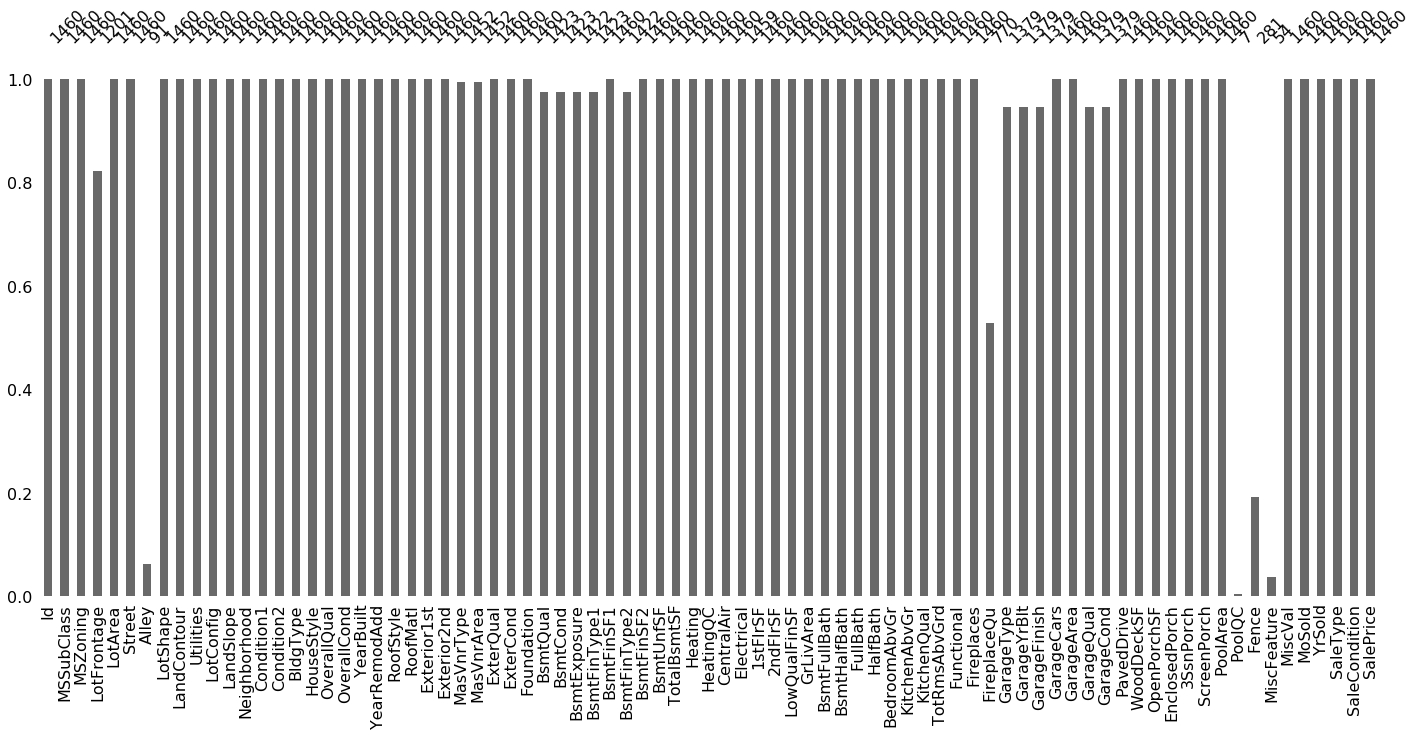

In [4]:
#missingnoモジュールのインポート
import missingno as msno

#欠損値の有無をバーとして表示
#バーが1.0に満たない特徴量に欠損値が発生していると確認できる
msno.bar(df_train)

### 2.欠損値が何パーセント含まれるかを確認する。

In [5]:
# 欠損値があるデータをカウント
Total = df_train.isnull().sum()
# 欠損値の割合を算出
missing_rate = Total / len(df_train)

#　テーブルにカウントした欠損値と割合を格納
missing_table = pd.DataFrame({
    'Total': Total,
    'missing_rate': missing_rate
})

#欠損値の割合が大きい順にソートする
missing_table.sort_values(by='missing_rate', ascending=False)

,Total,missing_rate
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


### 3.5つ以上欠損値がある特徴量（列）は削除する。

In [6]:
# 行数１４６０のうち、非欠損値が1455未満（＝欠損値が５つ以上）の場合の列を削除する
df_train.dropna(axis=1, thresh=1455)[:10]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


### 4.欠損値があるサンプル（行）は削除する。

In [7]:
# 欠損値を含む行を全て削除
df_train.dropna()
#全ての行に欠損値が含まれているため、全行削除

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## 【課題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

- 尖度
- 歪度

- 尖度  

分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示します。サンプルサイズを$n$、各データ$x_i(i:1,2,\cdots,n)$の平均値を$\overline{x}$、標準偏差を$s$とすると尖度は次の式から求められます。

$$
    \frac{n(n+1)}{(n-1)(n-2)(n-3)}\sum_{i=1}^{n}\frac{(x_i - \overline{x})^4}{s^4}-\frac{3(n-1)^2}{(n-2)(n-3)}
$$

 正規分布より尖った分布（データが平均付近に集中し、分布の裾が重い）のときには正の値を、正規分布より扁平な分布（データが平均付近から散らばり、分布の裾が軽い）のときには負の値をとります。正規分布の場合には0になります。


- 歪度

分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のことです。サンプルサイズを$n$、各データ$x_i(i:1,2,\cdots,n)$の平均値を$\overline{x}$、標準偏差を$s$とすると歪度は次の式から求められます。

$$
    \frac{n}{(n-1)(n-2)}\sum_{i=1}^{n}\Bigl(\frac{x_i - \overline{x}}{s}\Bigr)^3
$$

「右裾が長い」もしくは「右に歪んだ」もしくは「左に偏った」分布のときには正の値を、「左裾が長い」もしくは「左に歪んだ」もしくは「右に偏った」分布のときには負の値をとります。左右対称の分布（例えば正規分布）の場合には0になります。

## 【課題6】分布の確認
- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。  

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

### 1.seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

/Users/yusuke-saruya/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


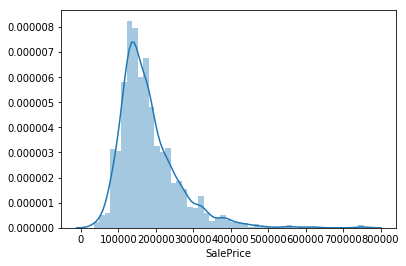

尖度 : 6.536281860064529
歪度 : 1.8828757597682129


In [8]:
import seaborn as sns

#目的変数"SalePrice"の分布を表示する
sns.distplot(df_train["SalePrice"])
plt.show()

# 尖度と歪度を算出する
print("尖度 :", df_train["SalePrice"].kurt())
print("歪度 :", df_train["SalePrice"].skew())

### 2.目的変数に対して対数変換を行う。

In [9]:
#目的変数"SalePrice"に対して対数変換を行う
df_train_SalePrice_log = np.log(df_train["SalePrice"])

### 3.対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

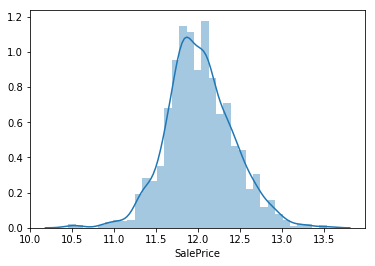

尖度 : 0.8095319958036296
歪度 : 0.12133506220520406


In [10]:
#対数変換した目的変数"SalePrice"の分布を表示する
sns.distplot(df_train_SalePrice_log)
plt.show()

# 尖度と歪度を算出する
print("尖度 :", df_train_SalePrice_log.kurt())
print("歪度 :", df_train_SalePrice_log.skew())

### ※対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。
対数変換を行うことにより、目的変数の分布が正規分布に近づいたことが上記プロット図より確認できる。  
また、尖度・歪度についても、それぞれ対数変換を行うことにより数値が0に近づいており、予測時の精度を上げることができる。

### 【課題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。


補足

重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

### 1.相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

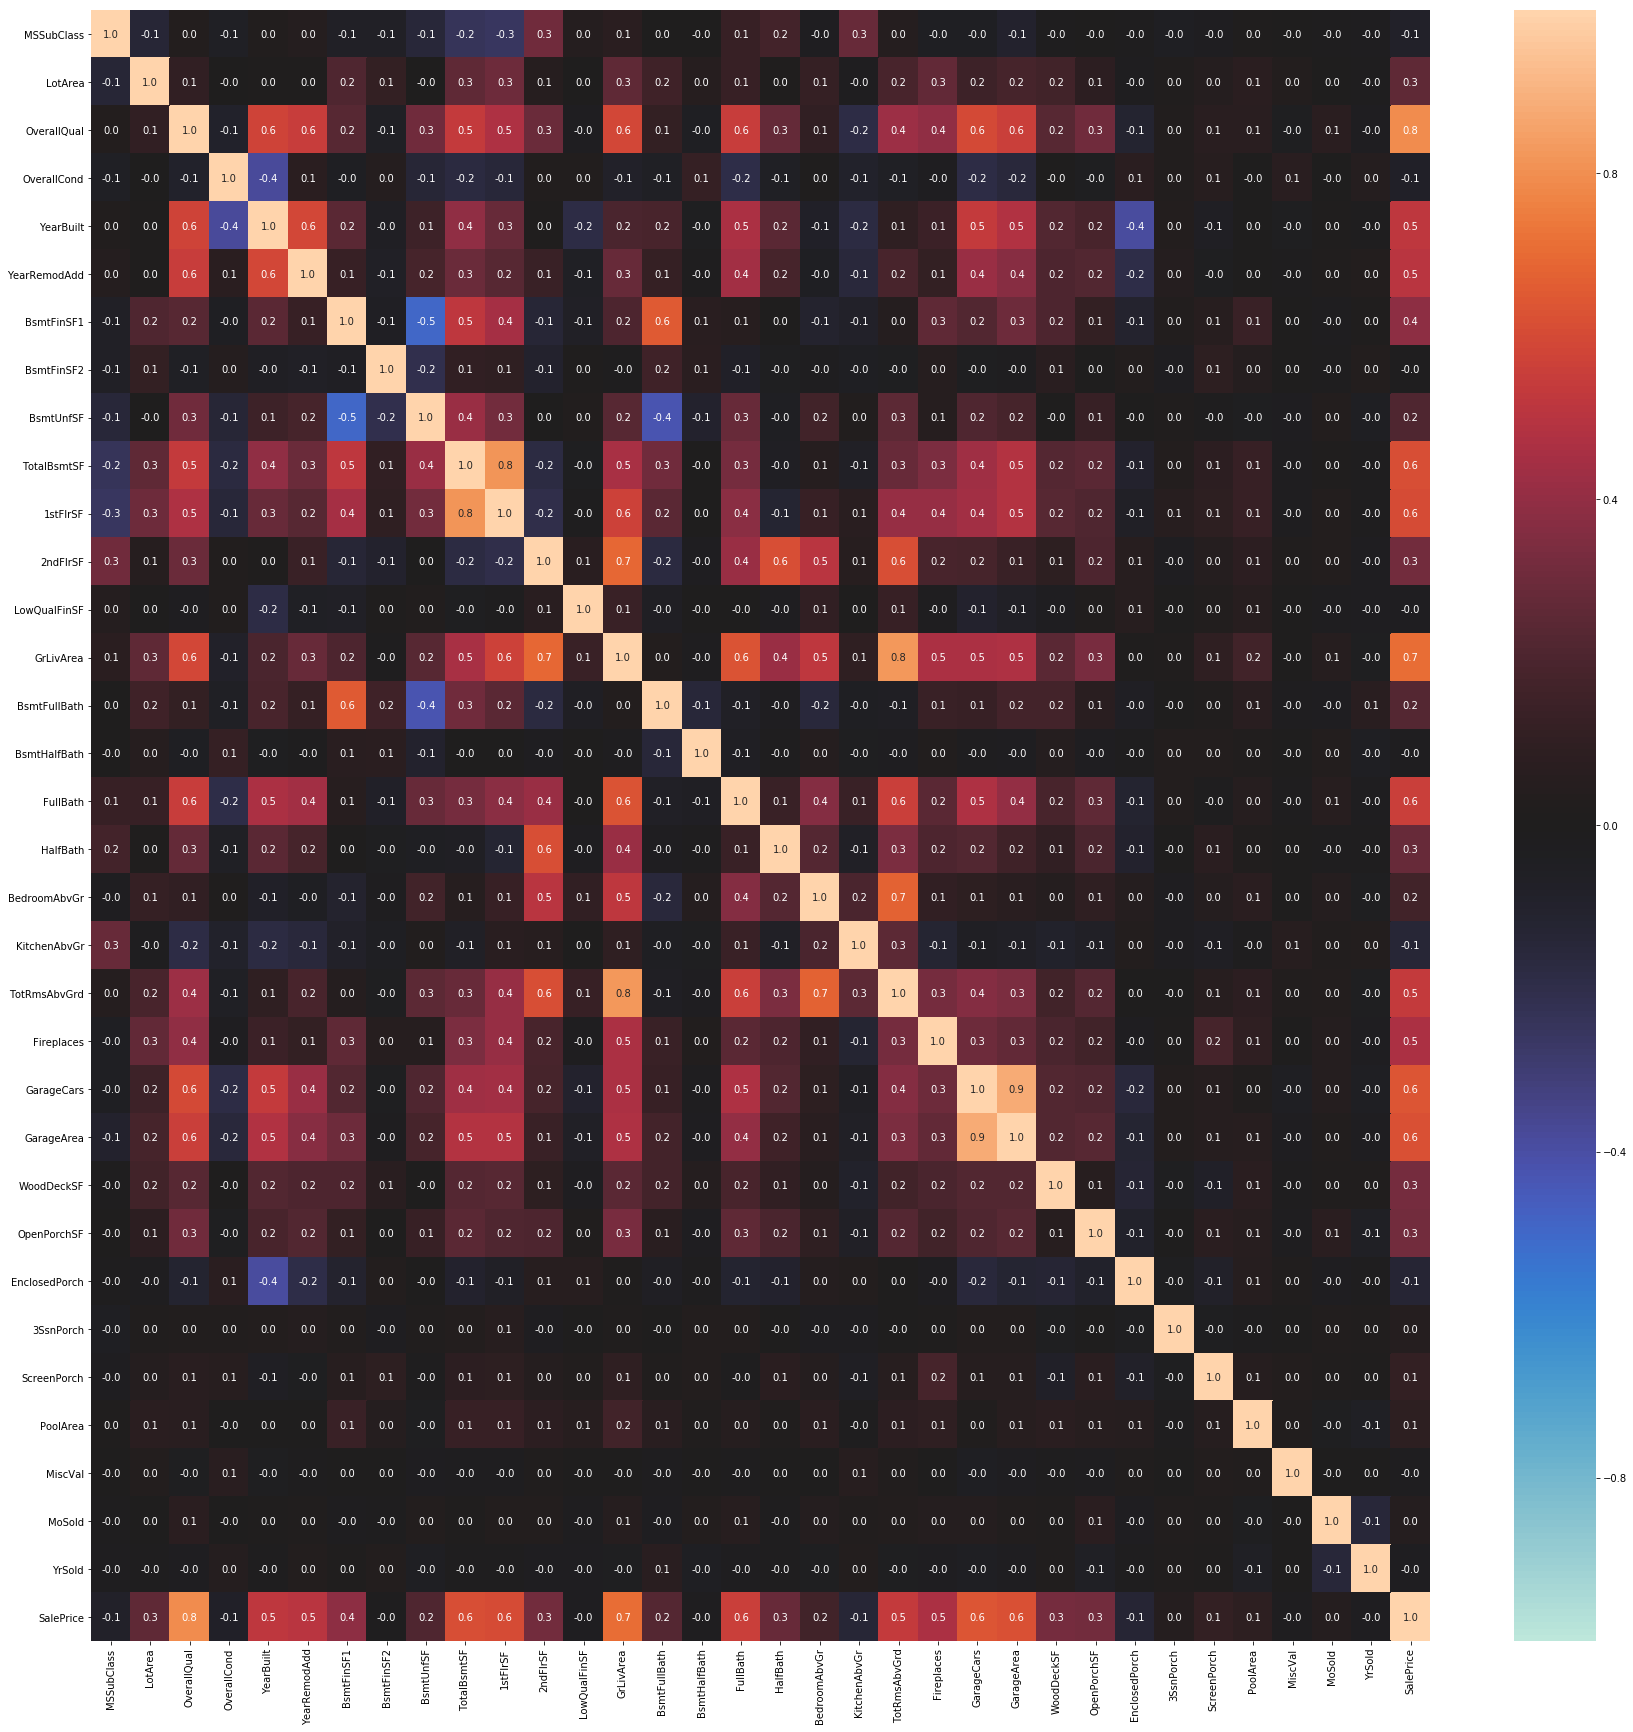

In [11]:
# 行数１４６０のうち、非欠損値が1455未満（＝欠損値が５つ以上）の場合の列を削除する
df_train_drop = df_train.dropna(axis=1, thresh=1455)

# "Id"を対象外とする
df_train_drop = df_train_drop.drop(["Id"], axis=1)

#相関係数行列を作成
corr_df_train = df_train_drop.corr(method="pearson")

#図を拡大する
plt.figure(figsize=(30,30))

#ヒートマップを作成
sns.heatmap(corr_df_train,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            fmt='.1f',
            annot=True, # True:格子の中に値を表示
            xticklabels=corr_df_train.columns.values,
            yticklabels=corr_df_train.columns.values, 
           )

#出力
plt.show()

### 相関係数が高い関係

In [12]:
#組み合わせリスト作成用のモジュール
import itertools

#相関係数行列より、組み合わせを作る
corr_df_train_combi = list(itertools.combinations(corr_df_train, 2))

#相関係数が高い組み合わせを格納する本リストの作成
high_corr_list = np.array([]).reshape([0,3])

#組み合わせの数だけ繰り返す
for i in range(len(corr_df_train_combi)):
    #　組み合わせを定義
    combination1 = corr_df_train_combi[i][0]
    combination2 = corr_df_train_combi[i][1]
    #指定の相関係数以上であれば、
    if abs(corr_df_train[combination1][combination2])  > 0.7:
            #空の仮リストに組み合わせと相関係数を仮リストに格納する
            high_corr_list_i = np.array([])
            high_corr_list_i = np.append(high_corr_list_i, combination1)
            high_corr_list_i = np.append(high_corr_list_i, combination2)
            high_corr_list_i = np.append(high_corr_list_i, corr_df_train[combination1][combination2])
            #作成した仮リストを１行として本リストに追加する
            high_corr_list = np.vstack(((high_corr_list, high_corr_list_i)))
            
# 出力
print(high_corr_list)

[['OverallQual' 'SalePrice' '0.7909816005838047']
 ['TotalBsmtSF' '1stFlrSF' '0.8195299750050355']
 ['GrLivArea' 'TotRmsAbvGrd' '0.8254893743088377']
 ['GrLivArea' 'SalePrice' '0.7086244776126511']
 ['GarageCars' 'GarageArea' '0.8824754142814603']]


※相関係数の絶対値が0.8以上のものを抽出。

|カラム名１ |カラム名２ |相関係数|
|:-:|:-:|:-:|
|GarageCars |GarageArea |0.8824754142814603 |
|GrLivArea |TotRmsAbvGrd |0.8254893743088377 |
|TotalBsmtSF |1stFlrSF |0.8195299750050355 |
|OverallQual |SalePrice |0.7909816005838047 |
|GrLivArea |SalePrice |0.7086244776126511 |

### 2.目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

In [13]:
#目的変数との相関の高い特徴量１０個をリストに格納
highcorr_SalePrice_feature10 = corr_df_train.sort_values('SalePrice', ascending=False)["SalePrice"].index.values[0:11]

print(highcorr_SalePrice_feature10)

# 上記で取得した特徴量のデータセットを作成
df_train_10 = df_train_drop[highcorr_SalePrice_feature10]

#相関係数行列を作成
corr_df_train_10 = df_train_10.corr(method="pearson")

corr_df_train_10


['SalePrice' 'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea'
 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt'
 'YearRemodAdd']


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855


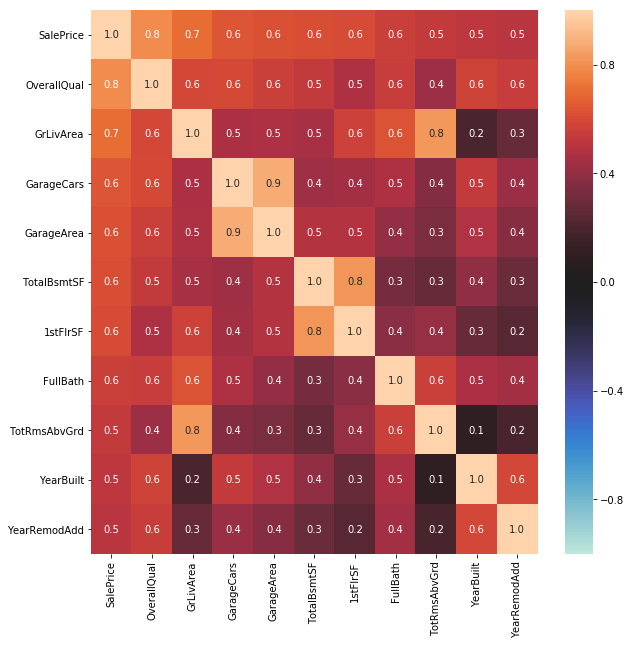

In [14]:
#図を拡大する
plt.figure(figsize=(10,10))

#ヒートマップを作成
sns.heatmap(corr_df_train_10,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            fmt='.1f',
            annot=True, # True:格子の中に値を表示
            xticklabels=corr_df_train_10.columns.values,
            yticklabels=corr_df_train_10.columns.values, 
           )

#出力
plt.show()

### 3.選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

1. OverallQual  
家の品質を１０段階で表示（1:とてもひどい〜10:とても素晴らしい）
1. GrLivArea  
居住エリアの面積、延べ床面積（平方フィート）
1. GarageCars  
車庫に入る車の数を表示
1. GarageArea  
車庫の面積（平方フィート）
1. TotalBsmtSF  
地下の面積（平方フィート）
1. 1stFlrSF  
建物１階の面積（平方フィート）
1. FullBath  
フルバスルーム(浴槽・シャワー・洗面台・便器の4点が備え付けられた部屋)の数
1. TotRmsAbvGrd  
バスルームを除いた部屋の数
1. YearBuilt  
竣工年
1. YearRemodAdd  
改築した年（改築していない場合、竣工年と同じ年を表示）

### 4.選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。


In [15]:
#目的関数SalePriceを除く１０個の特徴量のリスト作成
highcorr_SalePrice_feature10_escape = corr_df_train.sort_values('SalePrice', ascending=False)["SalePrice"].index.values[1:11]

# 上記で取得した特徴量のデータセットを作成
df_train_10_escape = df_train_drop[highcorr_SalePrice_feature10_escape]

#相関係数行列を作成
corr_df_train_10_escepe = df_train_10_escape.corr(method="pearson")

#相関係数行列より、組み合わせを作る
corr_df_train_combi_10 = list(itertools.combinations(corr_df_train_10_escepe,2))

#相関係数が高い組み合わせを格納する本リストの作成
high_corr_list_10 = np.array([]).reshape([0,3])

#組み合わせの数だけ繰り返す
for i in range(len(corr_df_train_combi_10)):
    #　組み合わせを定義
    combination1 = corr_df_train_combi_10[i][0]
    combination2 = corr_df_train_combi_10[i][1]
    #指定の相関係数以上であれば、
    if abs(corr_df_train_10_escepe[combination1][combination2])  > 0.8:
            #空の仮リストに組み合わせと相関係数を仮リストに格納する
            high_corr_list_i = np.array([])
            high_corr_list_i = np.append(high_corr_list_i, combination1)
            high_corr_list_i = np.append(high_corr_list_i, combination2)
            high_corr_list_i = np.append(high_corr_list_i, corr_df_train_10_escepe[combination1][combination2])
            #作成した仮リストを１行として本リストに追加する
            high_corr_list_10 = np.vstack(((high_corr_list_10, high_corr_list_i)))
               
# 出力
print(high_corr_list_10)




[['GrLivArea' 'TotRmsAbvGrd' '0.8254893743088377']
 ['GarageCars' 'GarageArea' '0.8824754142814603']
 ['TotalBsmtSF' '1stFlrSF' '0.8195299750050355']]


**相関係数の高い組み合わせ３つ**

|カラム名１ |カラム名２ |相関係数|
|:-:|:-:|:-:|
|GarageCars |GarageArea |0.8824754142814603 |
|GrLivArea |TotRmsAbvGrd |0.8254893743088377 |
|TotalBsmtSF |1stFlrSF |0.8195299750050355 |


## （オプション）【課題8】重要度の算出
ランダムフォレストという機械学習手法を用いることで、重要度の値を算出できます。この値は推定を行った時に、各特徴量がどれだけ推定値に寄与しているかを表すものです。ランダムフォレストは推定によく使われる手法ですが、ここでは推定自体が目的ではなく、あくまで重要度を算出するために使います。

In [16]:
#重要度算出用ライブラリのインポート
from sklearn.ensemble import RandomForestRegressor

# インスタンス作成　n_estimators:作る決定木の数の指定
rf_reg = RandomForestRegressor(n_estimators=10)

#説明変数と目的変数を学習
rf_reg = rf_reg.fit(df_train_10_escape, df_train_drop["SalePrice"])

#特徴量の重要度を算出
fti = rf_reg.feature_importances_

print('重要度:')
#enumerate : インデックス番号, 要素を順に取得する
for i, feat in enumerate(highcorr_SalePrice_feature10_escape):
    print('\t{0:10s} : {1:>.6f}'.format(feat, fti[i]))

重要度:
	OverallQual : 0.606760
	GrLivArea  : 0.142958
	GarageCars : 0.018201
	GarageArea : 0.032796
	TotalBsmtSF : 0.057566
	1stFlrSF   : 0.057765
	FullBath   : 0.009447
	TotRmsAbvGrd : 0.008386
	YearBuilt  : 0.034197
	YearRemodAdd : 0.031927


### （オプション）【課題9】さらなる探索
Kaggleのカーネルを参考に、ここまでの課題にないことにも挑戦し、ノートブックにまとめてください。

### 散布図と回帰モデルの可視化
目的変数"SalePrice"と相関関係が高い特徴量それぞれに対して散布図と回帰モデルを可視化。  
下図の通り、相関係数が高いと直線に対してそれぞれのプロットのバラツキが小さくなることが視覚的に確認することができる。


**参考**
> https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner  
> 1.2 Relation of features to target (SalePrice_log)

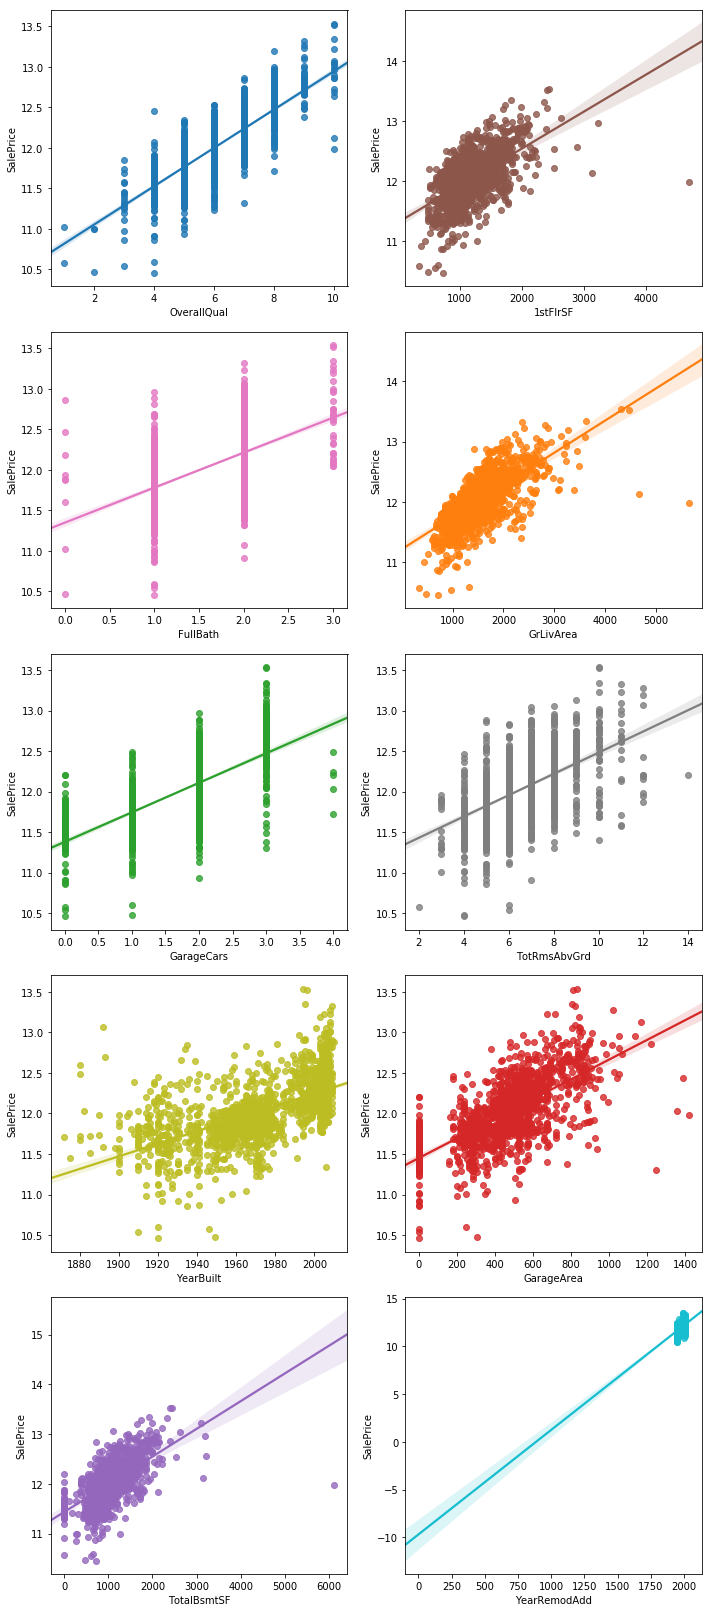

In [18]:
#図を表示する行・列を設定
nr_rows = 5
nr_cols = 2
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5,nr_rows*4.5))

# 目的変数と、それに対して相関係数が高い特徴量ごとに散布図・回帰モデルをセット
#目的変数は対数変換を行ったものを利用
for i in range(len(df_train_10_escape.columns)):
    sns.regplot(df_train_10_escape.iloc[:, i], df_train_SalePrice_log, ax = axs[i%5][i%2])

#グラフのラベルが重ならないように自動調整
plt.tight_layout()    

#図を表示
plt.show()   